# Naive Bayes Models

## Import Libraries

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

## Read CSV Files

In [2]:
no_retract = pd.read_csv('./no_retraction_data_plos_only_cleaned.csv')
no_retract = no_retract.drop(columns=['Unnamed: 0', 'Unnamed: 0.1', 'Unnamed: 0.1.1'])

retract = pd.read_csv('./retraction_data_plos_only_cleaned.csv')
retract = retract.drop(columns=['Unnamed: 0', 'Unnamed: 0.1', 'Unnamed: 0.1.1'])

In [3]:
total = pd.read_csv('./total_data_plos_only_cleaned.csv')
total = total.drop(columns=['Unnamed: 0', 'Unnamed: 0.1', 'Unnamed: 0.1.1'])
total.head()

,doi,year,month,day,volume,issue,journal,title,text,abstract,keywords,retraction_binary,unpacked_keywords,clean_text,clean_text_lem
0,10.1208/s12249-016-0596-x,2016.0,8.0,10.0,18.0,5.0,AAPS PharmSciTech,Study of the Transformations of Micro/Nano-cry...,‘Polymorphism’ generally referred as the abili...,This study elucidates the physical properties ...,"['monoclinic', 'nano-sized crystals', 'orthorh...",1,"['monoclinic', 'nano-sized', 'crystals', 'orth...",Polymorphism generally referred as the ability...,Polymorphism generally referred a the ability ...
1,10.1021/acscentsci.9b00224,2019.0,5.0,9.0,5.0,6.0,ACS central science,Targeted Protein Internalization and Degradati...,Traditional\ndrug development efforts are focu...,Targeted,[],1,[],Traditional drug development efforts are focus...,Traditional drug development effort are focuse...
2,10.1021/acsomega.8b00488,2018.0,6.0,27.0,3.0,6.0,ACS omega,Regulating the Microstructure of Intumescent F...,Intumescent flame retardants\nare now being us...,A compatibilizer,[],1,[],Intumescent flame retardants are now being use...,Intumescent flame retardant are now being used...
3,10.1021/acsomega.8b00153,2018.0,6.0,25.0,3.0,6.0,ACS omega,Solid-to-Solid Crystallization of Organic Thin...,Crystal growth process is basic and essential ...,The solid-to-solid crystallization processes o...,[],1,[],Crystal growth process is basic and essential ...,Crystal growth process is basic and essential ...
4,10.1107/S1600536811022574,2011.0,6.0,18.0,67.0,NaN,"Acta crystallographica. Section E, Structure r...",Oxonium picrate.,For general background to organic salts of pic...,"The title compound, H3O+·C6H2N3O7",[],1,[],For general background to organic salts of pic...,For general background to organic salt of picr...


## Naive Bayes Modeling

### Baseline Model

In [7]:
X = total['clean_text_lem']
y = total['retraction_binary']

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

In [9]:
y_test.value_counts(normalize=True).mul(100).round(2)

0    85.54
1    14.46
Name: retraction_binary, dtype: float64

### Initializing Models

In [4]:
X = total['clean_text_lem']
y = total['retraction_binary']

In [5]:
lemmatizer = WordNetLemmatizer()
lem_stopwords = [lemmatizer.lemmatize(i) for i in stopwords.words("english")]

retraction_stopwords = ['wa', 'using', 'et', 'al', 'figure', 'usepackage', 'used', 'fig', 'also', 
                        'ml', 'ha', 'two', 'one', 'may', 'based', 'table', 'however', 'data', 'mm', 'ms']

lem_retraction_stopwords = [lemmatizer.lemmatize(i) for i in retraction_stopwords]

#https://www.quora.com/Is-there-any-list-of-stopwords-related-to-scientific-papers
science_stopwords = ['any','apply','applying','reapplying','given','papers','paper','about',
                     'results','result','real','world','page','article','present','takes',
                     'account', 'previous','work','propose','proposes','proposed','simply','simple',
                     'demonstrate','demonstrated','demonstrates','realworld','datasets','dataset',
                     'provide','important','research','researchers','experiments','experiment','unexpected',
                     'discovering','using','recent','collected','solve','columns','existing','traditional',
                     'final','consider','presented','provides','automatically','extracting','including','help',
                     'helps','explore','illustrate','achieve','better']

lem_science_stopwords = [lemmatizer.lemmatize(i) for i in science_stopwords]

total_stopwords = stopwords.words("english") + lem_stopwords + retraction_stopwords + lem_retraction_stopwords + science_stopwords + lem_science_stopwords





#stopwords not super helpful because always talking in third person passive

In [6]:
def naive_bayes(test_size_value, vectorizer_setting, stop_words_lists, max_features_values, gram_setting):
    X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42, test_size = test_size_value)
    
    if vectorizer_setting == 'CountVectorizer':
        vectorizer = CountVectorizer(analyzer = 'word',
                                     tokenizer = None,
                                     preprocessor = None,
                                     stop_words = stop_words_lists,
                                     max_features = max_features_values)
    else:
        vectorizer = TfidfVectorizer(ngram_range = gram_setting, 
                               max_features = max_features_values, 
                               stop_words = stop_words_lists)
    
    vectorizer.fit(X_train)
    X_train = vectorizer.transform(X_train)
    X_test = vectorizer.transform(X_test)
    X_train_df = pd.DataFrame(X_train.toarray(),
                          columns=vectorizer.get_feature_names())
    X_test_df = pd.DataFrame(X_test.toarray(),
                          columns=vectorizer.get_feature_names())
    
    mnb = MultinomialNB()
    
    mnb.fit(X_train_df, y_train)
    print(f'Score on training set: {mnb.score(X_train_df, y_train).round(3)}')
    print(f'Score on training set: {mnb.score(X_test_df, y_test).round(3)}')
    
    plot_confusion_matrix(mnb, X_test_df, y_test, cmap='Blues', values_format='d');

### Changing Number of Features for Count Vectorizer

Score on training set: 0.766
Score on training set: 0.751


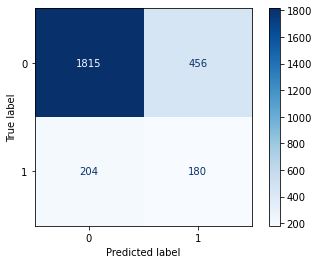

In [24]:
naive_bayes(0.25, 'CountVectorizer', total_stopwords, 5000, None)

Score on training set: 0.853
Score on training set: 0.791


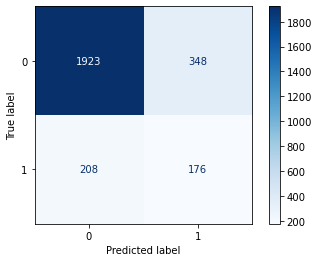

In [25]:
naive_bayes(0.25, 'CountVectorizer', total_stopwords, 20000, None)

Score on training set: 0.903
Score on training set: 0.809


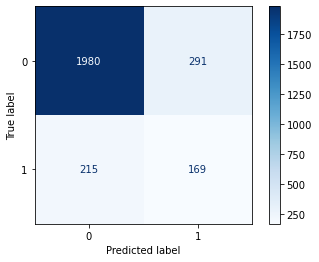

In [7]:
naive_bayes(0.25, 'CountVectorizer', total_stopwords, 50000, None)

|Changing Parameter(s)|Training Accuracy|Testing Accuracy|Sensitivity|Precision|Correct Retractions Detected|
|---|---|---|---|---|---|
|5000 features|76.6%|75.1%|0.469|0.283|180|
|20000 features|85.3%|79.1%|0.458|0.336|176|
|50000 features|90.3%|81.9%|0.440|0.367|169|

### Changing Number of Features and N-Gram Parameter for TF-IDF Vectorizer

Score on training set: 0.865
Score on training set: 0.862


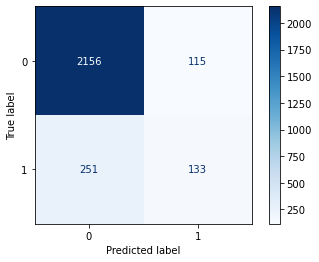

In [8]:
naive_bayes(0.25, 'TfidfVectorizer', total_stopwords, 5000, (1,2))

Score on training set: 0.889
Score on training set: 0.879


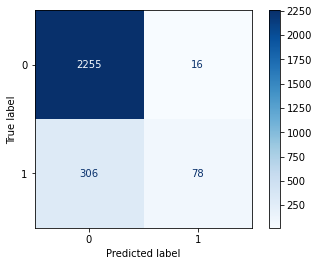

In [9]:
naive_bayes(0.25, 'TfidfVectorizer', total_stopwords, 20000, (1,2))

Score on training set: 0.869
Score on training set: 0.862


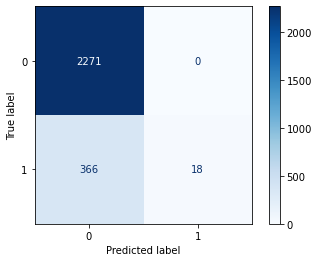

In [10]:
naive_bayes(0.25, 'TfidfVectorizer', total_stopwords, 50000, (1,2))

Score on training set: 0.865
Score on training set: 0.862


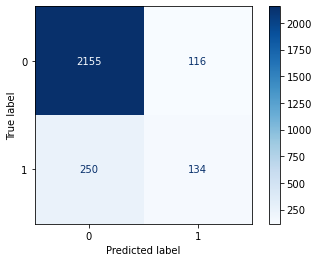

In [11]:
naive_bayes(0.25, 'TfidfVectorizer', total_stopwords, 5000, (1,3))

Score on training set: 0.888
Score on training set: 0.879


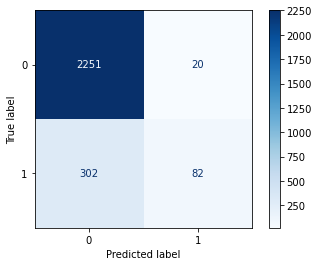

In [12]:
naive_bayes(0.25, 'TfidfVectorizer', total_stopwords, 20000, (1,3))

Score on training set: 0.871
Score on training set: 0.864


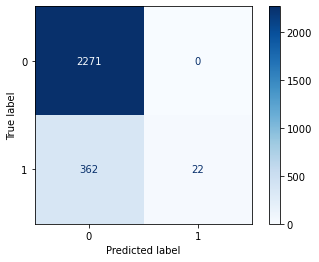

In [13]:
naive_bayes(0.25, 'TfidfVectorizer', total_stopwords, 50000, (1,3))

|Changing Parameter(s)|Training Accuracy|Testing Accuracy|Sensitivity|Precision|Correct Retractions Detected|
|---|---|---|---|---|---|
|5000 features, bigrams included|86.5%|86.2%|0.346|0.536|133|
|20000 features, bigrams included|88.9%|87.9%|0.203|0.830|78|
|50000 features, bigrams included|86.9%|86.2%|0.047|1|18|
|5000 features, bi and trigrams included|86.5%|86.2%|0.349|0.536|134|
|20000 features, bi and trigrams included|88.8%|87.9%|0.214|0.804|82|
|50000 features, bi and trigrams included|87.1%|86.4%|0.057|1|22|

### Changing Test Size for Count Vectorizer and TF-IDF Vectorizer

Score on training set: 0.847
Score on training set: 0.787


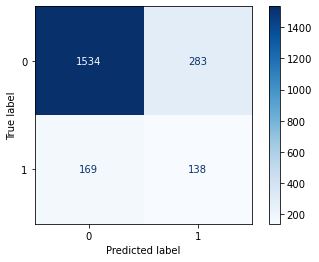

In [14]:
naive_bayes(0.2, 'CountVectorizer', total_stopwords, 20000, None)

Score on training set: 0.853
Score on training set: 0.791


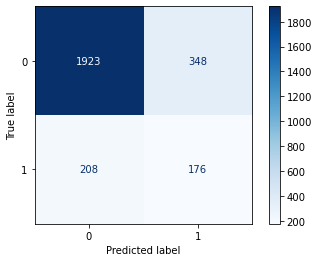

In [15]:
naive_bayes(0.25, 'CountVectorizer', total_stopwords, 20000, None)

Score on training set: 0.858
Score on training set: 0.796


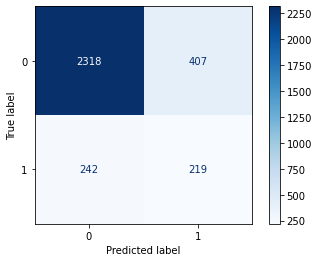

In [16]:
naive_bayes(0.3, 'CountVectorizer', total_stopwords, 20000, None)

|Changing Parameter(s)|Training Accuracy|Testing Accuracy|Sensitivity|Precision|Correct Retractions Detected|
|---|---|---|---|---|---|
|test size = 0.2|84.7%|78.7%|0.450|0.328|138|
|test size = 0.25|85.3%|79.1%|0.458|0.336|176|
|test size = 0.3|85.8%|79.6%|0.475|0.350|219|